Covid-19 exploratory data analysis
Data from the covid tracking project: https://covidtracking.com/ 

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [195]:
df = pd.read_csv('daily.csv', low_memory=False)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1873 non-null   int64  
 1   state                     1873 non-null   object 
 2   positive                  1866 non-null   float64
 3   negative                  1727 non-null   float64
 4   pending                   481 non-null    float64
 5   hospitalizedCurrently     235 non-null    float64
 6   hospitalizedCumulative    500 non-null    float64
 7   inIcuCurrently            75 non-null     float64
 8   inIcuCumulative           68 non-null     float64
 9   onVentilatorCurrently     71 non-null     float64
 10  onVentilatorCumulative    40 non-null     float64
 11  recovered                 236 non-null    float64
 12  hash                      1873 non-null   object 
 13  dateChecked               1873 non-null   object 
 14  death   

In [197]:
df.sample(5)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
1862,20200304,GA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,2,2,13,NaN,NaN,NaN,NaN,NaN
814,20200325,NJ,4402.0,10452.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14854,14854,14854,34,18.0,0.0,2127.0,727.0,2854.0
1870,20200304,TX,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,48,NaN,NaN,NaN,NaN,NaN
1729,20200308,NM,0.0,48.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,48,48,48,35,0.0,0.0,0.0,0.0,0.0
1477,20200313,OH,13.0,50.0,159.0,NaN,NaN,NaN,NaN,NaN,...,NaN,222,63,63,39,0.0,0.0,20.0,8.0,28.0


In [198]:
df.head(10)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200408,AK,226.0,6842.0,NaN,NaN,27.0,NaN,NaN,NaN,...,27.0,7068,7068,7068,2,1.0,4.0,142.0,13.0,155.0
1,20200408,AL,2369.0,16753.0,NaN,NaN,314.0,NaN,NaN,NaN,...,314.0,19122,19122,19122,1,10.0,43.0,3956.0,250.0,4206.0
2,20200408,AR,1000.0,13530.0,NaN,76.0,130.0,NaN,43.0,30.0,...,130.0,14530,14530,14530,5,2.0,-18.0,838.0,54.0,892.0
3,20200408,AS,0.0,20.0,11.0,NaN,NaN,NaN,NaN,NaN,...,NaN,31,20,20,60,0.0,0.0,0.0,0.0,0.0
4,20200408,AZ,2726.0,31838.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34564,34564,34564,4,7.0,0.0,1038.0,151.0,1189.0
5,20200408,CA,16957.0,127307.0,14600.0,2714.0,NaN,1154.0,NaN,NaN,...,NaN,158864,144264,144264,6,68.0,0.0,11943.0,1092.0,13035.0
6,20200408,CO,5429.0,22665.0,NaN,NaN,1079.0,NaN,NaN,NaN,...,1079.0,28094,28094,28094,8,29.0,85.0,962.0,257.0,1219.0
7,20200408,CT,7781.0,21255.0,NaN,1308.0,NaN,NaN,NaN,NaN,...,NaN,29036,29036,29036,9,0.0,0.0,0.0,0.0,0.0
8,20200408,DC,1440.0,6843.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8283,8283,8283,11,5.0,0.0,231.0,229.0,460.0
9,20200408,DE,928.0,7628.0,NaN,147.0,NaN,NaN,NaN,NaN,...,NaN,8556,8556,8556,10,0.0,0.0,0.0,0.0,0.0


In [199]:
df.tail(10)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
1863,20200304,IL,4.0,124.0,27.0,NaN,NaN,NaN,NaN,NaN,...,NaN,155,128,128,17,NaN,NaN,NaN,NaN,NaN
1864,20200304,MA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,2,2,25,NaN,NaN,NaN,NaN,NaN
1865,20200304,NC,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,37,NaN,NaN,NaN,NaN,NaN
1866,20200304,NH,2.0,10.0,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,19,12,12,33,NaN,NaN,NaN,NaN,NaN
1867,20200304,NY,6.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,...,NaN,78,54,54,36,NaN,NaN,NaN,NaN,NaN
1868,20200304,OR,3.0,29.0,18.0,NaN,NaN,NaN,NaN,NaN,...,NaN,50,32,32,41,NaN,NaN,NaN,NaN,NaN
1869,20200304,SC,0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5,5,5,45,NaN,NaN,NaN,NaN,NaN
1870,20200304,TX,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,48,NaN,NaN,NaN,NaN,NaN
1871,20200304,WA,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,39,39,39,53,NaN,NaN,NaN,NaN,NaN
1872,20200304,WI,1.0,19.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,26,20,20,55,NaN,NaN,NaN,NaN,NaN


Selected column descriptions:
- date - date of observation
- state - US state 2 digit code
- positive - number of tests with positive results
- negative - number of tests with negative results
- pending - number of test with pending results
- death - number of deaths
- total - total number of tests

In [200]:
#most updated date in current values are for April 4th, 2020

In [201]:
df1 = pd.read_csv('current.csv', low_memory=False)

In [202]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   positive                51 non-null     int64  
 2   positiveScore           51 non-null     int64  
 3   negativeScore           51 non-null     int64  
 4   negativeRegularScore    51 non-null     int64  
 5   commercialScore         51 non-null     int64  
 6   grade                   51 non-null     object 
 7   score                   51 non-null     int64  
 8   negative                51 non-null     int64  
 9   pending                 4 non-null      float64
 10  hospitalizedCurrently   22 non-null     float64
 11  hospitalizedCumulative  29 non-null     float64
 12  inIcuCurrently          10 non-null     float64
 13  inIcuCumulative         6 non-null      float64
 14  onVentilatorCurrently   10 non-null     floa

In [203]:
df1.head()

,state,positive,positiveScore,negativeScore,negativeRegularScore,commercialScore,grade,score,negative,pending,...,death,hospitalized,total,totalTestResults,posNeg,fips,dateModified,dateChecked,notes,hash
0,AK,226,1,1,1,1,A,4,6842,NaN,...,7,27.0,7068,7068,7068,2,2020-04-08T19:00:00Z,2020-04-08T19:13:00Z,"Please stop using the ""total"" field. Use ""tota...",c8335d4a25edf3ca27653180527f5c6429ec3835
1,AL,2547,1,1,0,1,B,3,18058,NaN,...,68,333.0,20605,20605,20605,1,2020-04-09T04:00:00Z,2020-04-09T13:02:00Z,"Please stop using the ""total"" field. Use ""tota...",832a32b4be7544f6b7e3e9700868c691b7b46add
2,AR,1000,1,1,1,1,A,4,13530,NaN,...,18,130.0,14530,14530,14530,5,2020-04-08T18:35:00Z,2020-04-08T20:43:00Z,"Please stop using the ""total"" field. Use ""tota...",54ccf3c3afaaf7532078ff6e6525f441f0e28b07
3,AZ,2726,1,1,0,1,B,3,31838,NaN,...,80,NaN,34564,34564,34564,4,2020-04-08T04:00:00Z,2020-04-09T02:09:00Z,"Please stop using the ""total"" field. Use ""tota...",abb602974f4bde0b2d9698356d0eba584817cf94
4,CA,16957,1,1,0,1,B,3,137776,14100.0,...,442,NaN,168833,154733,154733,6,2020-04-08T23:00:00Z,2020-04-09T13:46:00Z,"Please stop using the ""total"" field. Use ""tota...",b9fab255a8e8cc3a91f0c8ca5656c89316c33903


 Selected column descriptions (2nd data set)
   - state - State or territory postal code abbreviation.
   - positive - Total cumulative positive test results.
   - positiveScore - +1 for reporting positives reliably.
   -  negative - Total cumulative negative test results.
   -  negativeScore - +1 for reporting negatives sometimes.
   -  negativeRegularScore - +1 for reporting negatives reliably.
   - commercialScore - +1 for reporting all commercial tests.
   - score - Total reporting quality score.
   - grade - Letter grade based on score.
   - totalTestResults - Calculated value (positive + negative) of total test results.
   - hospitalized - Total cumulative number of people hospitalized.
   - death - Total cumulative number of people that have died.
   - dateModified - ISO 8601 date of the time the data was last updated by the state.
   - dateChecked - ISO 8601 date of the time we last visited their website
   - hash - A unique ID changed every time the data updates.
   - total - DEPRECATED Will be removed in the future. (positive + negative + pending). Pending has been an unstable value and should not count in any totals.


In [204]:
mydf = df[df['date']== 20200404]
mydf.head(5)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
224,20200404,AK,171.0,5869.0,NaN,NaN,16.0,NaN,NaN,NaN,...,16.0,6040,6040,6040,2,2.0,1.0,10.0,14.0,24.0
225,20200404,AL,1580.0,9273.0,NaN,NaN,212.0,NaN,NaN,NaN,...,212.0,10853,10853,10853,1,8.0,212.0,1086.0,148.0,1234.0
226,20200404,AR,743.0,9627.0,NaN,72.0,106.0,NaN,NaN,23.0,...,106.0,10370,10370,10370,5,2.0,1.0,632.0,39.0,671.0
227,20200404,AZ,2019.0,25141.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27160,27160,27160,4,11.0,0.0,2237.0,250.0,2487.0
228,20200404,CA,12026.0,101674.0,13000.0,2300.0,NaN,1008.0,NaN,NaN,...,NaN,126700,113700,113700,6,39.0,0.0,77075.0,1325.0,78400.0


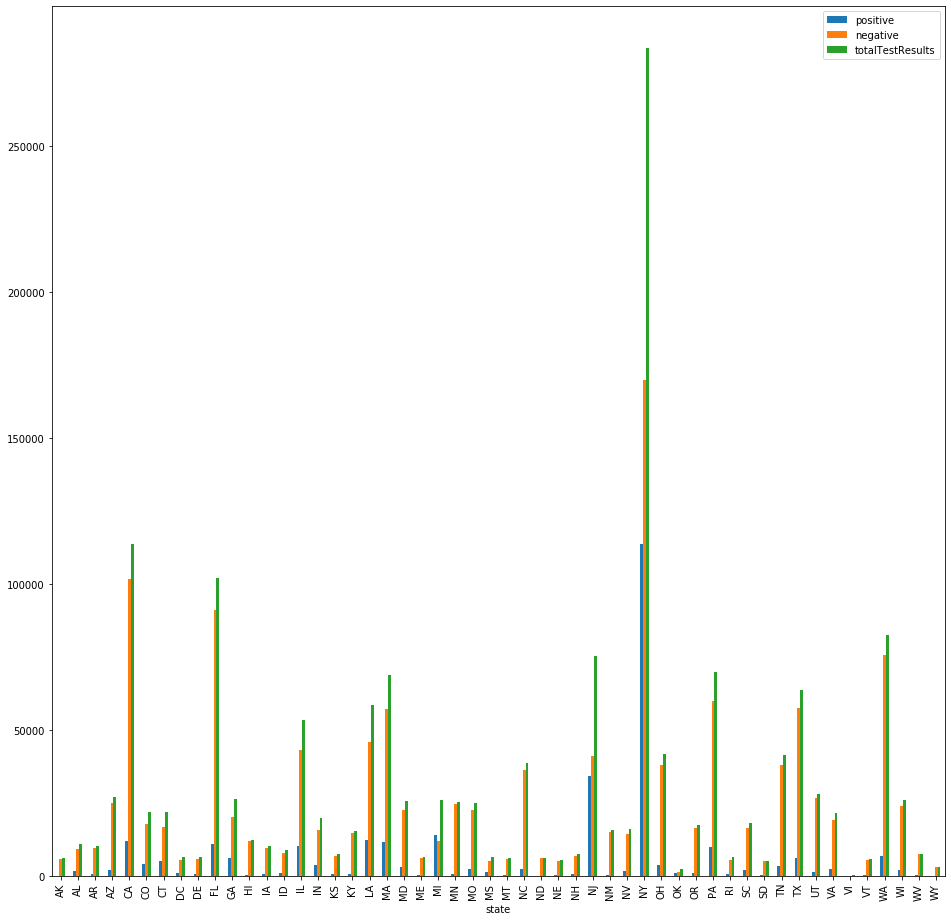

In [208]:
mydf.plot.bar(figsize = (16,16), x="state", y=["positive", "negative", 'totalTestResults'])
plt.show()

In [105]:
#I want to see number of cases and tests for population of that state

In [175]:
df2 = pd.read_excel('CleanCensus.xlsx')
df2.head()

,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,Census.1,2019PopEstimate
0,AK,710231,710249,713910,722128,730443,737068,736283,737498,741456,7.487795e+05,731545
1,AL,4779736,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4.874375e+06,4903185
2,AR,2915918,2916031,2921964,2940667,2952164,2959400,2967392,2978048,2989918,2.998359e+06,3017804
3,AZ,6392017,6392288,6407172,6472643,6554978,6632764,6730413,6829676,6941072,6.954363e+06,7278717
4,CA,37253956,37254519,37319502,37638369,37948800,38260787,38596972,38918045,39167117,3.935817e+07,39512223


In [176]:
mydf2 = pd.DataFrame()
mydf2['state'] = df2['Geographic Area']
mydf2['Population'] = df2['2019PopEstimate']
mydf2['totalTests'] = df1['totalTestResults']
mydf2['positive'] = df1['positive']
mydf2['negative'] = df1['negative']
mydf2['testsPerPop%'] = mydf2['totalTests'].divide(mydf2['Population'])
mydf2['testsPerPop%'] *= 100
mydf2['positivePerPop%'] = mydf2['positive'].divide(mydf2['Population'])
mydf2['positivePerPop%'] *= 100
mydf2.head()

,state,Population,totalTests,positive,negative,testsPerPop%,positivePerPop%
0,AK,731545,7068,226,6842,0.966174,0.030894
1,AL,4903185,20605,2547,18058,0.420237,0.051946
2,AR,3017804,14530,1000,13530,0.481476,0.033137
3,AZ,7278717,34564,2726,31838,0.474864,0.037452
4,CA,39512223,154733,16957,137776,0.391608,0.042916


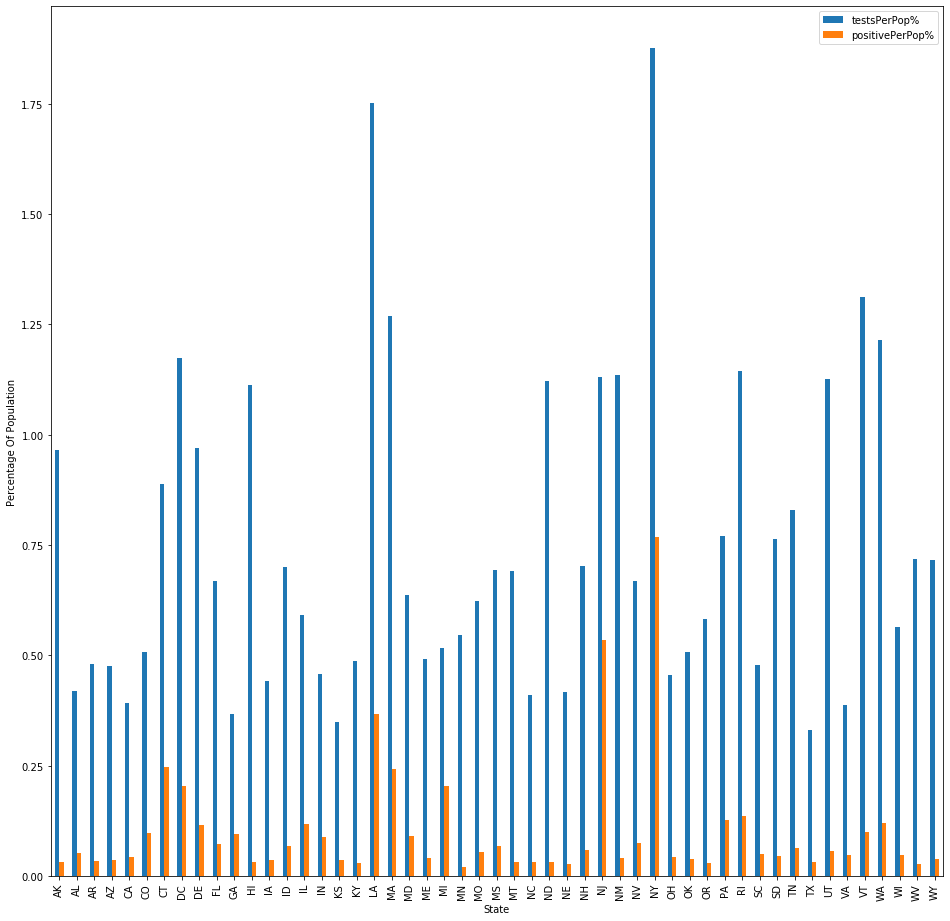

In [174]:
ax = mydf2.plot(figsize = (16,16), x="state", y=["testsPerPop%", "positivePerPop%"], kind="bar")
ax.set_xlabel('State')
ax.set_ylabel('Percentage Of Population')
ax.set_title("")
plt.show()

In [178]:
fig = go.Figure(data = go.Scatter(x = mydf2['testsPerPop%'], y = mydf2['positivePerPop%'], mode = 'markers', text = mydf2['state']))
fig.update_layout(title = "Positive cases versus tests per population", xaxis_title = 'tests per population [%]', yaxis_title = 'positive cases per population [%]')
fig.show()